# 模型正则化

模型正则化：限制参数的大小

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

### 过拟合

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [4]:
from sklearn.metrics import mean_squared_error

poly100_reg = PolynomialRegression(100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.3754848827875088

In [5]:
x_plot = np.linspace(-3, 3 , num=100).reshape(-1, 1)
y_plot = poly100_reg.predict(x_plot)

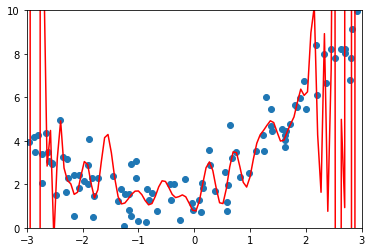

In [6]:
plt.scatter(x, y)
plt.plot(x_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

In [7]:
lin_reg.coef_

array([ 1.38631499e+13, -1.25544614e+00,  1.56026168e+02,  1.68069375e+03,
       -1.68601016e+04, -1.68272359e+05,  7.71064706e+05,  7.23090534e+06,
       -1.91996283e+07, -1.74354719e+08,  2.94974315e+08,  2.67388186e+09,
       -2.99793818e+09, -2.79560169e+10,  2.09075833e+10,  2.07407006e+11,
       -1.01035202e+11, -1.11497852e+12,  3.30270224e+11,  4.36549129e+12,
       -6.59203504e+11, -1.22918782e+13,  4.49650719e+11,  2.38651138e+13,
        1.37728519e+12, -2.84079880e+13, -4.08949174e+12,  1.19668495e+13,
        3.49365070e+12,  1.56684236e+13,  1.92292454e+12, -1.72710909e+13,
       -3.90708216e+12, -1.10171333e+13, -2.28767095e+12,  1.50569286e+13,
        3.46634225e+12,  1.31064858e+13,  4.25862934e+12, -8.28344845e+12,
       -1.52192116e+12, -1.56818437e+13, -5.94812160e+12, -3.53224842e+12,
       -1.58040014e+12,  1.16427502e+13,  2.10690938e+12,  1.42875218e+13,
        6.62702778e+12,  6.94354739e+11,  2.64446129e+12, -1.09551649e+13,
       -3.19269432e+12, -

可以看到过拟合的时候系数值会很大

### 模型正则化

目标：使

$$\sum_{i=1}^m(y^{(i)} - \theta_0 - \theta_1X_1^{(i)} - \theta_2X_2^{(i)} - \ldots - \theta_nX_n^{(i)})^2$$

尽可能小，即

目标：使

$$J(\theta) = MSE(y, \hat{y};\theta)$$

尽可能小

**加入模型正则化**

目标：使

$$J(\theta) = MSE(y, \hat{y};\theta) + \alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$$

尽可能小

- 可以看到模型正则化时，不需要考虑theta0，因为theta0是截距，不影响模型的陡峭程度
- 式子里的二分之一是为了求导后计算方便
- alpha是一个新得超参数，表示正则化时系数的权重，为0时不进行正则化

我们称这种模型正则化为岭回归

### 岭回归 Ridge Regression

目标：使

$$J(\theta) = MSE(y, \hat{y};\theta) + \alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$$

尽可能小

#### 过拟合

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
poly20_reg = PolynomialRegression(degree=20)
poly20_reg.fit(X_train, y_train)

y20_predict = poly20_reg.predict(X_test)
mean_squared_error(y_test, y20_predict)

167.94010860867127

In [10]:
y20_plot = poly20_reg.predict(x_plot)

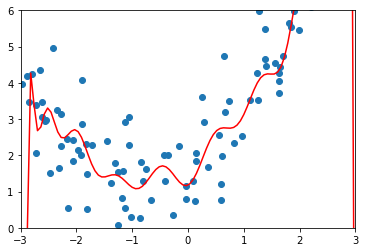

In [11]:
plt.scatter(x, y)
plt.plot(x_plot[:,0], y20_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [12]:
def plot_model(model):
    x_plot = np.linspace(-3, 3 , num=100).reshape(-1, 1)
    y_plot = model.predict(x_plot)
    
    plt.scatter(x, y)
    plt.plot(x_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

#### 岭回归

In [13]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [14]:
ridge00001_reg = RidgeRegression(20, 0.0001)
ridge00001_reg.fit(X_train, y_train)

y00001_ridge_predict = ridge00001_reg.predict(X_test)
mean_squared_error(y_test, y00001_ridge_predict)

1.3233214212703919

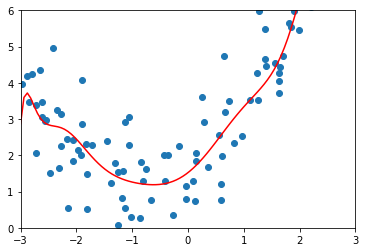

In [15]:
plot_model(ridge00001_reg)

In [16]:
ridge1_reg = RidgeRegression(20, 1)
ridge1_reg.fit(X_train, y_train)

y1_ridge_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_ridge_predict)

1.1805874402435317

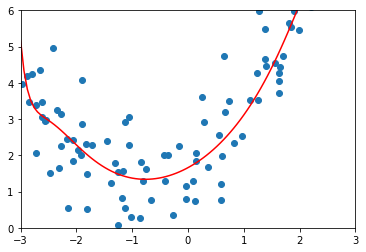

In [17]:
plot_model(ridge1_reg)

In [18]:
ridge100_reg = RidgeRegression(20, 100)
ridge100_reg.fit(X_train, y_train)

y100_ridge_predict = ridge100_reg.predict(X_test)
mean_squared_error(y_test, y100_ridge_predict)

2.183462033618558

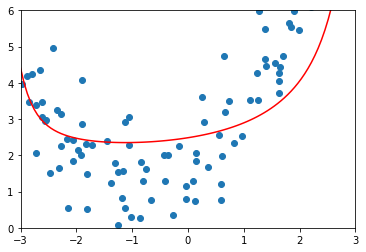

In [19]:
plot_model(ridge100_reg)